In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_palette("RdBu_r")

In [3]:
df = pd.read_excel('MPVDatasetDownload.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,Gila,Globe Police Department,Gunshot,"After midnight, a patrol officer was on routin...",Pending investigation,No known charges,https://www.azfamily.com/news/phoenix-man-arme...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,NaN,Male,Unknown race,NaN,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,Crittenden,"Memphis Police Department, Arkansas State Police",Gunshot,"Police began a chase regarding a kidnapping, e...",Pending investigation,No known charges,https://www.fox16.com/local-news-2/kidnapping-...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,Douglas,Omaha Police Department,Gunshot,Police responded to a domestic incident on the...,Pending investigation,No known charges,https://www.ketv.com/article/omaha-police-offi...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,King,Federal Way Police Department,Gunshot,Police responded to a domestic dispute. Police...,Pending investigation,No known charges,https://www.king5.com/article/news/local/2-fed...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,St. Louis,Chesterfield Police Department,Gunshot,Police went to Chesterfield Outlets about 1 p....,Pending investigation,No known charges,https://www.stltoday.com/news/local/crime-and-...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667


In [ ]:
"Victim's name", "Victim's age", "Victim's gender", "Victim's race", 'Date of Incident (month/day/year)', \
'City', 'State','County','Cause of death','A brief description of the circumstances surrounding the death',\
'Official disposition of death (justified or other)','Symptoms of mental illness?',
'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)','Fleeing (Source: WaPo)',
'Body Camera (Source: WaPo)',

In [5]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'ID'],
      dtype='object')

## Rename Column Names
* Rename some column names for better interpretability

In [102]:
column_names = df.columns

In [103]:
column_dict = {key:key for key in column_names}

In [104]:
column_dict['Victim\'s name'] = 'Name'
column_dict['Victim\'s age'] = 'Age'
column_dict['Victim\'s gender'] = 'Gender'
column_dict['Victim\'s race'] = 'Race'
column_dict['Date of Incident (month/day/year)'] = 'Date_of_Incident'
column_dict['A brief description of the circumstances surrounding the death'] = 'Description_Circumstance'
column_dict['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] = 'Geography_Type'
df.rename(column_dict,axis = 1,inplace = True)

# Changing Data Types
* Age to Numeric

In [98]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 28 columns):
Name                                                  7663 non-null object
Age                                                   7457 non-null float64
Gender                                                7655 non-null object
Race                                                  7663 non-null object
URL of image of victim                                4200 non-null object
Date_of_Incident                                      7663 non-null datetime64[ns]
Street Address of Incident                            7580 non-null object
City                                                  7657 non-null object
State                                                 7663 non-null object
Zipcode                                               7624 non-null float64
County                                                7648 non-null object
Agency responsible for death                          7647

In [394]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

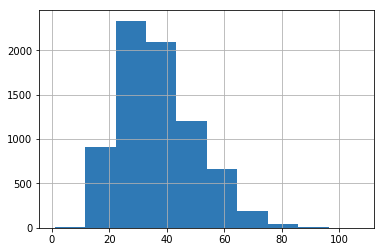

In [395]:
df['Age'].hist()

In [100]:
df['Age'].isnull().sum()

206

In [101]:
df['Age'].describe()

count    7457.000000
mean       36.796433
std        13.208652
min         1.000000
25%        27.000000
50%        34.000000
75%        45.000000
max       107.000000
Name: Age, dtype: float64

# Questions

* How many were victims in the span of the years?
* Where were the victims located?
* Who were the victims?
* Did they have any disabilities?
* How did they die?
* Were they armed?
* What were they armed with?
* Was the cop criminally charged?

## How many were victims in the span of the years?

In [4]:
df.shape

(7663, 27)

In [10]:
#turn date column in the datetime object
df['Date_of_Incident'] = pd.to_datetime(df['Date_of_Incident'])

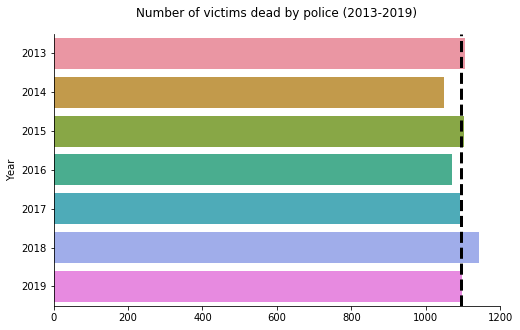

In [126]:
plt.figure(figsize=(8,5))
g = sns.countplot(y = df['Date_of_Incident'].dt.year)
g.axvline(df['Date_of_Incident'].dt.year.value_counts().mean(),color='black',linestyle = '--',linewidth = 3)
sns.despine()
plt.title('Number of victims dead by police (2013-2019)',y = 1.04)
plt.ylabel('Year')
plt.xlabel('');

In [65]:
print('There has been on average '+ '%.2f' % df['Date_of_Incident'].dt.year.value_counts().mean() + ' police killings each year from 2013-2019');

There has been on average 1094.71 police killings each year from 2013-2019


## Which geographical type had the most victims?

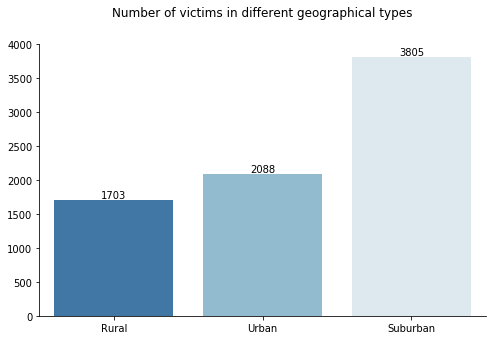

In [129]:
plt.figure(figsize = (8,5))
g= sns.countplot(df['Geography_Type'])
for p in g.patches:
    plt.text(p.get_x()+ p.get_width()/2,p.get_height(),p.get_height(),ha='center', va='bottom')
sns.despine()
plt.title('Number of victims in different geographical types',y=1.08)
plt.xlabel('')
plt.ylabel('');

## Which State had the most victims?

In [91]:
import folium
from urllib.request import urlopen
import json

In [92]:
state_count =df['State'].value_counts().reset_index()

In [93]:
m = folium.Map(location=[37, -102], zoom_start=4)

In [94]:
response = urlopen('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')

In [95]:
state_geo = json.loads(response.read())

In [97]:
m.choropleth(geo_data = state_geo,
            name = 'choropleth',
            data = state_count,
            columns = ['index','State'],
            key_on='feature.id',
            fill_color = 'YlGn',
            fill_opacity = 0.7,
            line_opacity = .2,
            legend_name = 'Number of Victims',
            )
folium.LayerControl().add_to(m);

In [99]:
m.save('state_vcount.html')

In [433]:
m

## How old were the Victims?

''

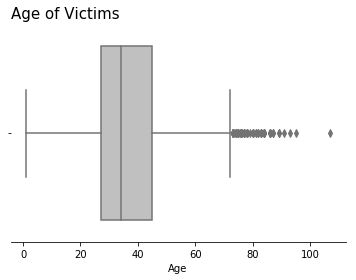

In [432]:
plt.title('Age of Victims',loc = 'left',fontsize =15)
sns.boxplot(df['Age'],color = 'silver')
sns.despine(left =True)
;

## Which Gender died the most?

In [454]:
df['Gender'].value_counts(normalize = True)[0:2]

Male      0.947485
Female    0.051078
Name: Gender, dtype: float64

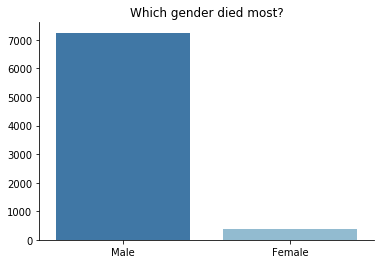

In [453]:
plt.title("Which gender died most?")
sns.barplot(df['Gender'].value_counts()[0:2].index,df['Gender'].value_counts()[0:2].values)
sns.despine();

## Which Race died the most to police?

In [107]:
df['Race'].value_counts()

White               3378
Black               1944
Hispanic            1335
Unknown race         670
Asian                118
Native American      112
Unknown Race          64
Pacific Islander      42
Name: Race, dtype: int64

In [117]:
#rename Unknown Race and Unknown race to just Unknown
df['Race'] = np.where(df['Race'].isin(['Unknown race','Unknown Race']),'Unknown',df['Race'])

In [145]:
pie_data =df['Race'].value_counts(normalize= True)
pie_data

White               0.440820
Black               0.253687
Hispanic            0.174214
Unknown             0.095785
Asian               0.015399
Native American     0.014616
Pacific Islander    0.005481
Name: Race, dtype: float64

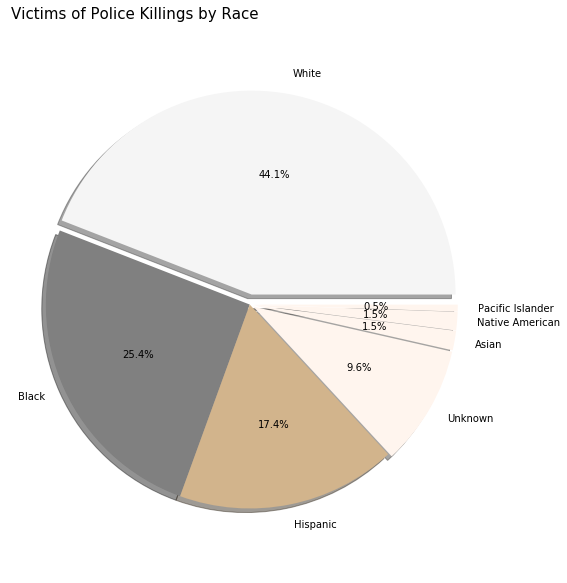

In [203]:
colors = ['whitesmoke','gray','tan','seashell','seashell','seashell','seashell']
plt.figure(figsize= (8,8))
plt.pie(pie_data,explode = (.05,0,0,.02,.02,.02,.02),colors=colors
        ,labels = pie_data.index,autopct='%1.1f%%',shadow = True)
plt.axis('equal')
plt.tight_layout()
plt.title('Victims of Police Killings by Race',loc= 'Left', fontsize = 15);

## Did the victims have disabilities?
* Around 20% of the victims from 2013-2019 had a disability
* Around 15% of police do not know if the victim had a disability
* Police should get better training to identify those with a mental illness

In [208]:
df['Symptoms of mental illness?'].value_counts(normalize= True)

No                     0.622713
Yes                    0.191715
Unknown                0.146498
Drug or alcohol use    0.038683
Unkown                 0.000131
unknown                0.000131
Unknown                0.000131
Name: Symptoms of mental illness?, dtype: float64

In [211]:
#change all mispelled words "Unknown" to "Unknown"
df['Symptoms of mental illness?'] =\
np.where(
    ~df['Symptoms of mental illness?'].isin(['Yes','No','Drug or alcohol use']),
    'Unknown',
    df['Symptoms of mental illness?']
)

In [212]:
df['Symptoms of mental illness?'].value_counts(normalize= True)

No                     0.621819
Yes                    0.191439
Unknown                0.148114
Drug or alcohol use    0.038627
Name: Symptoms of mental illness?, dtype: float64

In [ ]:
g= sns.countplot(df['Geography_Type'])
for p in g.patches:
    plt.text(p.get_x()+ p.get_width()/2,p.get_height(),p.get_height(),ha='center', va='bottom')
sns.despine()

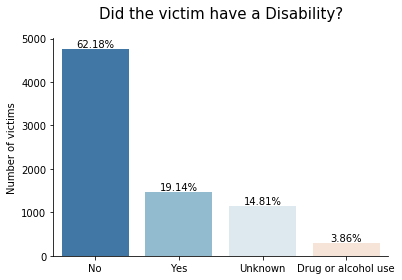

In [491]:
g = sns.countplot(df['Symptoms of mental illness?'], order = ['No','Yes','Unknown','Drug or alcohol use'])
for p in g.patches:
    plt.text(p.get_x()+ p.get_width()/2,p.get_height(),'{:.2f}%'.format(p.get_height()/df.shape[0] * 100),ha='center', va='bottom')
sns.despine()
plt.title('Did the victim have a Disability?',pad=20,fontsize = 15)
plt.xlabel('')
plt.ylabel('Number of victims');

## How did the victims die?
* Most victims died do to gunshot wounds more than 92%

In [216]:
df['Cause of death'].value_counts(normalize = True);

## Were the victims armed? What were they armed with?
* Most common alleged weapons are gun, vehicle and knife.
* Many victims were also unarmed

In [296]:
df['Unarmed'].value_counts(normalize = True)

Allegedly Armed    0.708339
Unarmed            0.140023
Unclear            0.084693
Vehicle            0.066945
Name: Unarmed, dtype: float64

In [245]:
#change the alleged weapon all the title format to make all values consistent
df['Alleged Weapon (Source: WaPo)'] = df['Alleged Weapon (Source: WaPo)'].str.title().str.strip()

In [274]:
import wordcloud

In [294]:
weapons_text = " ".join(weapon for weapon in df['Alleged Weapon (Source: WaPo)'])

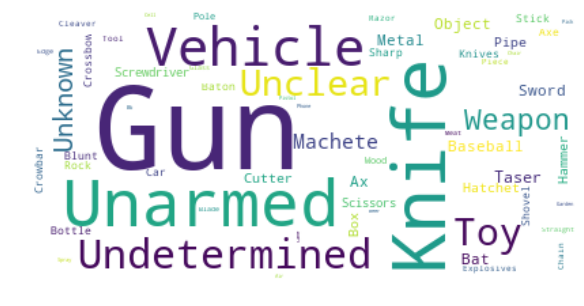

In [295]:
wcloud = wordcloud.WordCloud(background_color ='White',collocations = False).generate(weapons_text)
plt.figure(figsize=(10,5))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off');

## Were the cops criminally charged?

In [310]:
df['Criminal Charges?'] = df['Criminal Charges?'].str.title()

In [314]:
df['Criminal Charges?'] = np.where(df['Criminal Charges?']=='No Known Charges','No',df['Criminal Charges?'])

In [319]:
#create new column with just charged vs not charged
df['Charged'] = np.where(~(df['Criminal Charges?']=='No'),'Yes','No')

In [321]:
df['Charged'].value_counts(normalize=True)

No     0.98682
Yes    0.01318
Name: Charged, dtype: float64

In [322]:
df[df['Unarmed'] == 'Unarmed']['Charged'].value_counts(normalize=True)

No     0.93383
Yes    0.06617
Name: Charged, dtype: float64

In [327]:
df[df['Unarmed'] != 'Unarmed']['Charged'].value_counts(normalize=True)

No     0.995448
Yes    0.004552
Name: Charged, dtype: float64

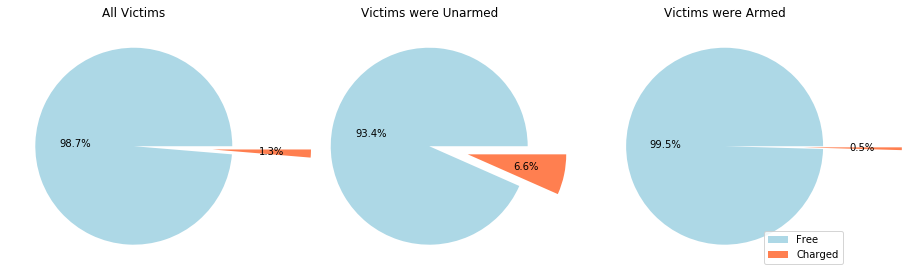

In [390]:
plt.figure(figsize = (15,10))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.pie(df['Charged'].value_counts(normalize=True),explode = (0,.8),autopct = '%1.1f%%',colors = ['lightblue','coral'])
ax2.pie(df[df['Unarmed'] == 'Unarmed']['Charged'].value_counts(normalize=True),explode = (0,.4),autopct = '%1.1f%%',colors = ['lightblue','coral'])
ax3.pie(df[df['Unarmed'] != 'Unarmed']['Charged'].value_counts(normalize=True),explode = (0,.8),autopct = '%1.1f%%',colors = ['lightblue','coral'])
ax1.set_title('All Victims')
ax2.set_title('Victims were Unarmed')
ax3.set_title('Victims were Armed')
plt.legend(['Free','Charged'],loc = 'lower right');